## Using Inbuilt Naive Baye's Classifier

In [1]:
import numpy as np
import pandas as pd
import operator
import os, sys
from sklearn import model_selection
import re, string
import matplotlib.pyplot as plt

In [2]:
# These are the stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
# X is a list further made in form of tuple, where first element is name of document and second is the text in documents.
# Y is the category

# Chamge the path of dataset as required
X = []
Y = []

for category in os.listdir("Datasets"):
    for document in os.listdir("Datasets/"+category):
        with open("Datasets/"+category+'/'+document,"r") as f:
            X.append((document, f.read()))
            Y.append(category)

In [4]:
# DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))

# Here X is in the form of list tuple where 1st element of each tuple is name of document and 2nd is text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [5]:
# splitting the data into training and testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)

In [6]:
# split has done in nearly 3:1 ratio
print(len(X_train))
print(len(X_test))

14997
5000


In [7]:
# Example for showing re.split()
sample_text = 'Hey I am Navjot. I am happy. What about you'
print(re.split(r'\W+', sample_text))

['Hey', 'I', 'am', 'Navjot', 'I', 'am', 'happy', 'What', 'about', 'you']


In [8]:
dic = {}
for i in range(len(X_train)):
    # Took [1] because [0] is name of doc and [1] is text in doc
    word = X_train[i][1].lower()
    # splitting the text into words
    stripped = re.split(r'\W+', word)
    # iterating over each word
    # we will not include stop_words, alpha-numerics, punctuations or irrelevant wordof less than two letters in our dictionary.
    for s in stripped:
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s] += 1
        else:
            dic[s] = 1
            
dic

{'newsgroups': 15304,
 'comp': 9695,
 'windows': 5407,
 'path': 15279,
 'cantaloupe': 19512,
 'srv': 24252,
 'cmu': 39241,
 'edu': 122870,
 'crabapple': 4679,
 'ece': 4088,
 'europa': 4136,
 'eng': 5250,
 'gtefsd': 4118,
 'com': 37693,
 'darwin': 1799,
 'sura': 2781,
 'net': 19156,
 'news': 25650,
 'dfn': 71,
 'solaris': 83,
 'clausthal': 15,
 'yonglong': 5,
 'ipi': 5,
 'uni': 692,
 'hannover': 30,
 'subject': 16105,
 'help': 2508,
 'wanted': 1086,
 'display': 741,
 'stereo': 168,
 'images': 609,
 'accelerator': 131,
 'message': 16482,
 'newsserver': 567,
 'rrzn': 9,
 'sender': 8261,
 'service': 1089,
 'reply': 3200,
 'organization': 14876,
 'university': 7443,
 'date': 15603,
 'mon': 1466,
 'may': 5973,
 'gmt': 13324,
 'lines': 15646,
 'friends': 367,
 'sparc': 102,
 'workstation': 131,
 'now': 4368,
 'equippied': 1,
 'want': 3295,
 'use': 5052,
 'double': 348,
 'buffers': 21,
 'can': 14757,
 'access': 2094,
 'switch': 365,
 'functions': 261,
 'xgl': 3,
 'phigs': 99,
 'xlib': 136,
 'e

In [9]:
# sorting the dictionary on the basis of frequency of words in descending order

sorted_dic = sorted(dic.items(), key = operator.itemgetter(1), reverse = True)
sorted_dic

[('edu', 122870),
 ('cmu', 39241),
 ('com', 37693),
 ('news', 25650),
 ('not', 24720),
 ('srv', 24252),
 ('cantaloupe', 19512),
 ('net', 19156),
 ('message', 16482),
 ('subject', 16105),
 ('lines', 15646),
 ('date', 15603),
 ('apr', 15440),
 ('newsgroups', 15304),
 ('path', 15279),
 ('organization', 14876),
 ('can', 14757),
 ('state', 14152),
 ('gmt', 13324),
 ('ohio', 11925),
 ('one', 11610),
 ('will', 11260),
 ('writes', 11051),
 ('article', 10040),
 ('comp', 9695),
 ('references', 9690),
 ('talk', 9170),
 ('misc', 8947),
 ('ans', 8345),
 ('howland', 8263),
 ('sender', 8261),
 ('reston', 8251),
 ('don', 7917),
 ('like', 7746),
 ('people', 7655),
 ('university', 7443),
 ('just', 7374),
 ('posting', 7332),
 ('nntp', 7037),
 ('mps', 6906),
 ('know', 6905),
 ('host', 6681),
 ('sci', 6483),
 ('get', 6480),
 ('think', 6237),
 ('zaphod', 6219),
 ('usenet', 6197),
 ('may', 5973),
 ('politics', 5908),
 ('alt', 5835),
 ('also', 5582),
 ('windows', 5407),
 ('eng', 5250),
 ('harvard', 5247),
 ('

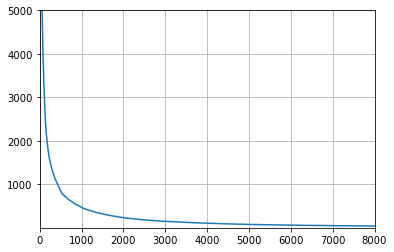

In [10]:
# Plotting graph on no. of words vs frequency
# On basis of graph we can decide the number of features we want to take.

features = sorted_dic
answer1 = []
answer2 = []
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])

plt.plot(answer1, answer2)
plt.axis([0,8000, 1, 5000])
plt.grid()
plt.show()


In [11]:
# We decided to take top 2000 words with max frequency as our features
# here feature list in answer1

In [12]:
answer1 = [features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'can',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'howland',
 'sender',
 'reston',
 'don',
 'like',
 'people',
 'university',
 'just',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'think',
 'zaphod',
 'usenet',
 'may',
 'politics',
 'alt',
 'also',
 'windows',
 'eng',
 'harvard',
 'time',
 'rutgers',
 'near',
 'use',
 'new',
 'rec',
 'good',
 'crabapple',
 'noc',
 'sei',
 'well',
 'das',
 'system',
 'soc',
 'xref',
 'now',
 'cis',
 'even',
 'europa',
 'gtefsd',
 'see',
 'ece',
 'world',
 'org',
 'way',
 'religion',
 'uunet',
 'gov',
 'say',
 'make',
 'much',
 'first',
 'christian',
 'god',
 'two',
 'max',
 'right',
 'many',
 'rochester',
 'distribution',
 'club',
 'space',
 'mail',
 'gatech',
 'andrew',
 'want',
 'ibm',
 'anyone',


In [13]:
# Making X_train dataset
# No. of rows is equivalent to rows in X_train and coloumn is equal to length of answer1(features).

X_train_dataset = np.zeros([len(X_train), len(answer1)], int)
for i in range(len(X_train)):
    words = X_train[i][1].lower()
    word = re.split(r'\W+', words)
    
    # Iterating over each word
    for j in word:
        # We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            X_train_dataset[i][answer1.index(j)] += 1
print(X_train_dataset)
        

[[ 3  3  1 ...  0  0  0]
 [ 6  3  0 ...  0  0  0]
 [11  4  4 ...  0  0  0]
 ...
 [14  1  0 ...  0  0  0]
 [15  3  4 ...  0  0  0]
 [ 6  4  5 ...  0  0  0]]


In [14]:
# Making X_test dataset
# No. of rows is equivalent to rows in x_test and column is equal to length of answer1(feature list)
X_test_dataset = np.zeros([len(X_test), len(answer1)], int)
for i in range(len(X_test)):
    words = X_test[i][1].lower()
    word = re.split(r'\W+', words)
    # Iterating over each word
    for j in word:
        # We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            X_test_dataset[i][answer1.index(j)] += 1
print(X_test_dataset)         

[[15  2  2 ...  0  0  0]
 [ 6  4  1 ...  0  0  0]
 [11  1  2 ...  0  0  0]
 ...
 [ 1  1  4 ...  0  0  0]
 [ 8  1  2 ...  0  0  0]
 [ 5  2  4 ...  0  0  0]]


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
clf = MultinomialNB()
clf.fit(X_train_dataset, Y_train)
Y_pred = clf.predict(X_test_dataset)
print('Score on training data: ', clf.score(X_train_dataset, Y_train))
print('Score on testing data: ', clf.score(X_test_dataset, Y_test))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Score on training data:  0.8941788357671534
Score on testing data:  0.8562
[[224   0   0   0   0   1   0   0   3   0   0   0   1   1   0   1   0   1
    0  37]
 [  0 176  15  14   9  20  12   2   0   2   0   0   8   1   0   0   0   0
    0   0]
 [  0   5 210  10   4  22   2   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  1   8   6 202  35   0   5   1   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   2   0  15 228   0   4   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  10  19   5   7 219   5   0   0   0   0   0   5   1   3   0   0   0
    0   0]
 [  0   1   0   0   0   0 212   1   1   0   0   0   3   0   0   0   1   0
    0   0]
 [  0   0   0   0   1   0   6 223   6   1   1   0   5   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   9   5 217   1   0   0   0   0   2   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   1   0 208  12   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   3   2  17 228   0   1   1   0   0   0   0
 

In [17]:
set(Y_train)

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

## Self Implementation of Naive Baye's

In [18]:
# Making dictionary for implementing Naive Baye's

def fit (X_train_dataset, Y_train):
    dic = {}
    total_word = 0
    Y_train = np.array(Y_train)
    # Total no. of document is calculated
    dic['total_doc'] = len(Y_train)
    classes = set(Y_train)
    for i in classes:
        temp = 0
        # selecting x_train corresponding to class present in y_train
        X_train_with_i = X_train_dataset[Y_train == i]
        # finding length of data with category corresponding to i
        temp2 = X_train_with_i.shape[0]
        dic[i] = {}
        # Iterating over answer1(actual feature list)
        for feature in answer1:
            # calculating total word in feature
            l = (X_train_with_i[:,answer1.index(feature)]).sum()
            dic[i][feature]= 1
            temp+=1 
        # total word in that class
        dic[i]['Word_in_class'] = temp
        # length of data with Y_train belonging to specific class
        dic[i]['length'] = temp2
        
    return dic
            

In [19]:
def probability(x_test, dic, classes):
    prob = np.log(dic[classes]['length']) - np.log(dic['total_doc'])
    feature = list(dic[classes].keys())
    # -2 is done because there will be 'length' and 'word in class' present in feature.
    for j in range(len(feature) - 2):
        xj = x_test[j]
        # if frequency is 0, we will not consider it
        if xj == 0:
            current_prob = 0
        else :
            # extra addition part is Laplace correction
            num = dic[classes][feature[j]]+1
            den = dic[classes]['Word_in_class']+ len(dic[classes].keys())-2
            current_prob = np.log(num)-np.log(den)
        prob += current_prob
    return prob
        

In [20]:
def predict_single_point(x_test, dic):
    first_run = True
    classes = dic.keys()
    for i in classes:
        if i == 'total_doc':
            continue
        prob = probability(x_test, dic, i)
        if first_run or prob>best_prob:
            best_prob = prob
            first_run = False
            best_class = i
    return best_class

In [21]:
def predict_(X_test, dic):
    y_pred = []
    for x in X_test:
        y_pred.append(predict_single_point(x, dic))
    return y_pred

In [30]:
def score(y_test, y_pred):
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            count+=1
    return count/len(y_pred)

In [23]:
dictionary = fit(X_train_dataset, Y_train)
Y_pred_new = predict_(X_test_dataset, dictionary)

In [24]:
#dictionary

In [28]:
print('Score on testing data: ', score(Y_test, Y_pred_new))
print(confusion_matrix(Y_test, Y_pred_new))
print(classification_report(Y_test, Y_pred_new))

Score on testing data:  219
[[  0   0   0   0   0   0 269   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 259   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 260   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 251   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 274   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 219   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 244   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 234   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 223   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 254   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 272   0   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
